In [1]:
# Importando Matplotlib e Numpy
import matplotlib.pyplot as plt
import matplotlib as mat
import numpy as np
%matplotlib inline

In [2]:
mat.__version__

'3.3.4'

In [3]:
np.__version__

'1.21.5'

Vamos supor que você registrou o tamanho e preço de pizzas que você comeu nos últimos meses com a sua família.

<table class="ArticleTableNoBorder">
	<tbody>
		<tr>
			<td><strong>Instância</strong></td>
			<td><strong>Diâmetro(cm)</strong></td>
            <td><strong>Preço(R$)</strong></td>
		</tr>
		<tr>
			<td><code>1</code></td>
			<td>7</td>
            <td>8</td>
		</tr>
		<tr>
			<td><code>2</code></td>
			<td>10</td>
            <td>11</td>
		</tr>
		<tr>
			<td><code>3</code></td>
			<td>15</td>
            <td>16</td>
		</tr>
		<tr>
			<td><code>4</code></td>
			<td>30</td>
            <td>38.5</td>
		</tr>
		<tr>
			<td><code>5</code></td>
			<td>45</td>
            <td>52</td>
		</tr>
	</tbody>
</table>

In [4]:
# Diâmetros (cm)
Diametros = [[7], [10], [15], [30], [45]]

# Preços (R$)
Precos = [[8], [11], [16], [38.5], [52]]

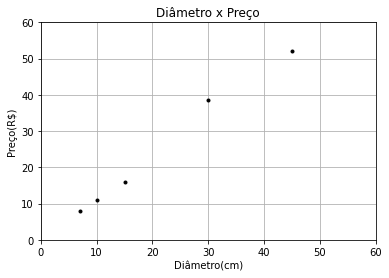

In [5]:
plt.figure()
plt.xlabel('Diâmetro(cm)')
plt.ylabel('Preço(R$)')
plt.title('Diâmetro x Preço')
plt.plot(Diametros, Precos, 'k.')
plt.axis([0, 60, 0, 60])
plt.grid(True)
plt.show()

In [6]:
import sklearn
sklearn.__version__

'0.22.1'

In [7]:
# Importando o módulo de Regressão Linear do scikit-learn
from sklearn.linear_model import LinearRegression

In [8]:
# Preparando os dados de treino

# Vamos chamar de X os dados de diâmetro da Pizza.
X = [[7], [10], [15], [30], [45]]

# Vamos chamar de Y os dados de preço da Pizza.
Y = [[8], [11], [16], [38.5], [52]]

In [9]:
# Criando o modelo
modelo = LinearRegression()

In [10]:
type(modelo)

sklearn.linear_model._base.LinearRegression

In [11]:
# Treinando o modelo
modelo.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# Prevendo o preço de uma pizza de 20 cm de diâmetro

# Não usamos mais esta sintaxe:
# print("Uma pizza de 20 cm de diâmetro deve custar: R$%.2f" % modelo.predict([20][0]))

# Usamos agora esta sintaxe:
print("Uma pizza de 20 cm de diâmetro deve custar: R$%.2f" % modelo.predict([[20]]))

Uma pizza de 20 cm de diâmetro deve custar: R$23.41


#### Construindo um Scatter Plot

In [24]:
# Coeficientes
print('Coeficiente: \n', modelo.coef_)

# MSE (mean square error)
print("MSE: %.2f" % np.mean((modelo.predict(X) - Y) ** 2))

# Score de variação: 1 representa predição perfeita
print('Score de variação: %.2f' % modelo.score(X, Y))

Coeficiente: 
 [[1.20422117]]
MSE: 2.74
Score de variação: 0.99


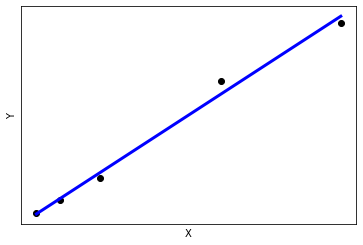

In [25]:
# Scatter Plot representando a regressão linear
plt.scatter(X, Y,  color = 'black')
plt.plot(X, modelo.predict(X), color = 'blue', linewidth = 3)
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(())
plt.yticks(())

plt.show()

#### Explorando o Dataset Boston Housing

#### Dataset: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [26]:
# Importando os módulos necessários
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [27]:
np.__version__

'1.21.5'

In [28]:
pd.__version__

'1.2.3'

In [29]:
# O dataset boston já está disponível no scikit-learn. Precisamos apenas carregá-lo.
from sklearn.datasets import load_boston
boston = load_boston()

In [30]:
# Verificando o tipo da variável boston
type(boston)

sklearn.utils.Bunch

In [31]:
# Visualizando o shape do dataset, neste caso 506 instâncias (linhas) e 13 atributos (colunas)
boston.data.shape

(506, 13)

In [32]:
# Descrição do Dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
print(boston.feature_names)

In [ ]:
# Convertendo o dataset em um DataFrame pandas
df = pd.DataFrame(boston.data)
df.head()

In [ ]:
# Convertendo o título das colunas
df.columns = boston.feature_names
df.head()

In [ ]:
# boston.target é uma array com o preço das casas 
boston.target

In [ ]:
# Adicionando o preço da casa ao DataFrame
df['PRICE'] = boston.target
df.head()

#### Prevendo o Preço das Casas em Boston

##### Y - variável dependente (preço das casas em Boston)
##### X - variáveis independentes ou explanatórias (todas as outras caracterísricas da casa)

In [ ]:
# Importando o módulo de regressão linear 
from sklearn.linear_model import LinearRegression

In [ ]:
# Não queremos o preço da casa como variável dependente
X = df.drop('PRICE', axis = 1)

In [ ]:
# Definindo Y
Y = df.PRICE

In [ ]:
plt.scatter(df.RM, Y)
plt.xlabel("Média do Número de Quartos por Casa")
plt.ylabel("Preço da Casa")
plt.title("Relação entre Número de Quartos e Preço")
plt.show()

In [ ]:
# Criando o objeto de regressão linear
regr = LinearRegression()

In [ ]:
# Tipo do objeto
type(regr)

In [ ]:
# Treinando o modelo
regr.fit(X, Y)

In [ ]:
# Coeficientes
print("Coeficiente: ", regr.intercept_)
print("Número de Coeficientes: ", len(regr.coef_))

In [ ]:
# Prevendo o preço da casa
regr.predict(X)

In [ ]:
# Comparando preços originais x preços previstos
plt.scatter(df.PRICE, regr.predict(X))
plt.xlabel("Preço Original")
plt.ylabel("Preço Previsto")
plt.title("Preço Original x Preço Previsto")
plt.show()

### Podemos ver que existem alguns erros na predição do preço das casas

In [ ]:
# Vamos calcular o MSE (Mean Squared Error)
mse1 = np.mean((df.PRICE - regr.predict(X)) ** 2)
print(mse1)

In [ ]:
# Aplicando regressão linear para apenas uma variável e calculando o MSE
regr = LinearRegression()
regr.fit(X[['PTRATIO']], df.PRICE)
mse2 = np.mean((df.PRICE - regr.predict(X[['PTRATIO']])) ** 2)
print(mse2)

In [ ]:
# Dividindo X em dados de treino e de teste
X_treino = X[:-50]
X_teste = X[-50:]

# Dividindo Y em dados de treino e de teste
Y_treino = df.PRICE[:-50]
Y_teste = df.PRICE[-50:]

# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dividindo X e Y em dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, df.PRICE, test_size = 0.33, random_state = 5)

In [ ]:
# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

In [ ]:
# Construindo um modelo de regressão
regr = LinearRegression()

In [ ]:
# Treinando o modelo
regr.fit(X_treino, Y_treino)

In [ ]:
# Definindo os dados de treino e teste
pred_treino = regr.predict(X_treino)
pred_teste = regr.predict(X_teste)

In [ ]:
# Comparando preços originais x preços previstos
plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()